# Regresión Lineal

Este notebook implementa un modelo de Regresión Lineal para predecir la popularidad de canciones.

## Objetivo
Implementar y evaluar un modelo de Regresión Lineal, comparando su desempeño en la tarea de predicción de popularidad.


In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Configuración de visualización
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("✅ Librerías importadas correctamente")


✅ Librerías importadas correctamente


: 

## 1. Carga de Datos

Cargamos los datos con feature engineering aplicado.


In [ ]:
# Configurar rutas (robusto para cualquier subdirectorio dentro de notebooks)
current = Path.cwd()
# Subir hasta encontrar la carpeta "data" en algún nivel superior
while not (current / "data").exists() and current.parent != current:
    current = current.parent

PROJ = current
DATA = PROJ / "data"

# Verificar que existe la carpeta data
assert DATA.exists(), f"No se encontró la carpeta 'data'. Directorio actual: {Path.cwd()}"

# Cargar datos con feature engineering
train_path = DATA / "train_fe.csv"
test_path = DATA / "test_fe.csv"

assert train_path.exists(), f"No se encontró {train_path}"
assert test_path.exists(), f"No se encontró {test_path}"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print(f"✅ Datos cargados correctamente")
print(f"📊 Ruta del proyecto: {PROJ}")
print(f"📊 Shape de train: {train.shape}")
print(f"📊 Shape de test: {test.shape}")
print(f"\nColumnas disponibles:")
print(train.columns.tolist())


✅ Datos cargados correctamente
📊 Ruta del proyecto: c:\Users\alfon\Escritorio\Licenciatura en Sistemas\Machine Learning\Obligatorio
📊 Shape de train: (79800, 17)
📊 Shape de test: (34200, 16)

Columnas disponibles:
['track_id', 'popularity', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'valence', 'tempo', 'time_signature', 'artist_count', 'album_mean_popularity', 'track_name_len', 'track_has_remix', 'track_has_acoustic', 'genre_mean_popularity']


## 2. Preparación de Datos

Separamos las características (X) de la variable objetivo (y) y eliminamos columnas no relevantes.


In [ ]:
# Variable objetivo
target_col = "popularity"

# Separar características y variable objetivo
X_train_full = train.drop(columns=[target_col, "track_id"])  # Eliminar track_id (identificador)
y_train_full = train[target_col]

# Preparar test (sin track_id)
X_test = test.drop(columns=["track_id"], errors="ignore")

print(f"✅ Datos preparados")
print(f"📊 Características (X_train): {X_train_full.shape}")
print(f"📊 Variable objetivo (y_train): {y_train_full.shape}")
print(f"\nCaracterísticas a utilizar:")
print(X_train_full.columns.tolist())


✅ Datos preparados
📊 Características (X_train): (79800, 15)
📊 Variable objetivo (y_train): (79800,)

Características a utilizar:
['explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'valence', 'tempo', 'time_signature', 'artist_count', 'album_mean_popularity', 'track_name_len', 'track_has_remix', 'track_has_acoustic', 'genre_mean_popularity']


## 3. División Train/Validation

Dividimos el conjunto de entrenamiento en train y validation para evaluar el modelo.


In [ ]:
# División train/validation (80/20)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, 
    y_train_full, 
    test_size=0.2, 
    random_state=42
)

print(f"✅ División completada")
print(f"📊 Train: {X_train.shape[0]} muestras")
print(f"📊 Validation: {X_val.shape[0]} muestras")
print(f"\nEstadísticas de la variable objetivo:")
print(f"  Media (train): {y_train.mean():.2f}")
print(f"  Media (validation): {y_val.mean():.2f}")
print(f"  Desviación estándar (train): {y_train.std():.2f}")
print(f"  Desviación estándar (validation): {y_val.std():.2f}")


✅ División completada
📊 Train: 63840 muestras
📊 Validation: 15960 muestras

Estadísticas de la variable objetivo:
  Media (train): 33.32
  Media (validation): 33.03
  Desviación estándar (train): 22.35
  Desviación estándar (validation): 22.24


## 4. Escalado de Características

La Regresión Lineal se beneficia del escalado de características, especialmente si usamos regularización.


In [ ]:
# Escalado de características
scaler = StandardScaler()

# Ajustar y transformar train
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Transformar validation y test
X_val_scaled = scaler.transform(X_val)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✅ Escalado completado")
print(f"📊 Estadísticas después del escalado (train):")
print(f"  Media: {X_train_scaled.mean().mean():.6f}")
print(f"  Desviación estándar: {X_train_scaled.std().mean():.6f}")


✅ Escalado completado
📊 Estadísticas después del escalado (train):
  Media: 0.000000
  Desviación estándar: 1.000008


## 5. Entrenamiento del Modelo

Entrenamos el modelo de Regresión Lineal.


In [ ]:
# Crear y entrenar el modelo
modelo_lr = LinearRegression()

print("🔄 Entrenando modelo de Regresión Lineal...")
modelo_lr.fit(X_train_scaled, y_train)
print("✅ Modelo entrenado correctamente")

# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Característica': X_train_scaled.columns,
    'Coeficiente': modelo_lr.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print(f"\n📊 Intercepto: {modelo_lr.intercept_:.4f}")
print(f"\nTop 10 características más importantes (por valor absoluto del coeficiente):")
print(coeficientes.head(10).to_string(index=False))


🔄 Entrenando modelo de Regresión Lineal...
✅ Modelo entrenado correctamente

📊 Intercepto: 33.3242

Top 10 características más importantes (por valor absoluto del coeficiente):
       Característica  Coeficiente
album_mean_popularity    15.851491
genre_mean_popularity     6.155243
     instrumentalness    -1.504887
         danceability     1.093859
          speechiness    -1.008172
               energy    -0.814860
             explicit     0.631084
             loudness     0.604995
              valence    -0.297883
                tempo    -0.183908


## 6. Predicciones

Realizamos predicciones en los conjuntos de train y validation.


In [ ]:
# Predicciones
y_train_pred = modelo_lr.predict(X_train_scaled)
y_val_pred = modelo_lr.predict(X_val_scaled)

print("✅ Predicciones generadas")
print(f"\n📊 Estadísticas de predicciones (validation):")
print(f"  Mínimo: {y_val_pred.min():.2f}")
print(f"  Máximo: {y_val_pred.max():.2f}")
print(f"  Media: {y_val_pred.mean():.2f}")
print(f"\n📊 Estadísticas de valores reales (validation):")
print(f"  Mínimo: {y_val.min():.2f}")
print(f"  Máximo: {y_val.max():.2f}")
print(f"  Media: {y_val.mean():.2f}")


✅ Predicciones generadas

📊 Estadísticas de predicciones (validation):
  Mínimo: -28.51
  Máximo: 113.67
  Media: 33.09

📊 Estadísticas de valores reales (validation):
  Mínimo: 0.00
  Máximo: 98.00
  Media: 33.03


## 7. Evaluación del Modelo

Calculamos métricas de evaluación: RMSE, MAE y R².


In [ ]:
# Métricas de evaluación
def evaluar_modelo(y_real, y_pred, conjunto="Conjunto"):
    """Calcula y muestra métricas de evaluación"""
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    
    print(f"\n📈 Métricas de evaluación - {conjunto}:")
    print(f"  RMSE (Root Mean Squared Error): {rmse:.4f}")
    print(f"  MAE (Mean Absolute Error): {mae:.4f}")
    print(f"  R² (Coeficiente de determinación): {r2:.4f}")
    
    return {'RMSE': rmse, 'MAE': mae, 'R²': r2}

# Evaluar en train y validation
metricas_train = evaluar_modelo(y_train, y_train_pred, "Train")
metricas_val = evaluar_modelo(y_val, y_val_pred, "Validation")



📈 Métricas de evaluación - Train:
  RMSE (Root Mean Squared Error): 12.0766
  MAE (Mean Absolute Error): 9.5283
  R² (Coeficiente de determinación): 0.7081

📈 Métricas de evaluación - Validation:
  RMSE (Root Mean Squared Error): 12.0795
  MAE (Mean Absolute Error): 9.5336
  R² (Coeficiente de determinación): 0.7049


## 7.5. Aplicación de Clipping

Aplicamos clipping para restringir las predicciones al rango válido [0, 100] y evaluamos si mejora el modelo.


In [ ]:
# Aplicar clipping al rango válido [0, 100] para popularidad
y_train_pred_clipped = np.clip(y_train_pred, 0, 100)
y_val_pred_clipped = np.clip(y_val_pred, 0, 100)

# Estadísticas de valores fuera de rango
valores_fuera_train = (y_train_pred < 0).sum() + (y_train_pred > 100).sum()
valores_fuera_val = (y_val_pred < 0).sum() + (y_val_pred > 100).sum()

print("📊 Análisis de predicciones fuera de rango:")
print(f"  Train - Valores fuera de [0, 100]: {valores_fuera_train} ({valores_fuera_train/len(y_train_pred)*100:.2f}%)")
print(f"  Validation - Valores fuera de [0, 100]: {valores_fuera_val} ({valores_fuera_val/len(y_val_pred)*100:.2f}%)")

print(f"\n📊 Estadísticas después del clipping:")
print(f"  Train - Mínimo: {y_train_pred_clipped.min():.2f}, Máximo: {y_train_pred_clipped.max():.2f}")
print(f"  Validation - Mínimo: {y_val_pred_clipped.min():.2f}, Máximo: {y_val_pred_clipped.max():.2f}")

# Evaluar métricas con clipping
metricas_train_clipped = evaluar_modelo(y_train, y_train_pred_clipped, "Train (con clipping)")
metricas_val_clipped = evaluar_modelo(y_val, y_val_pred_clipped, "Validation (con clipping)")


📊 Análisis de predicciones fuera de rango:
  Train - Valores fuera de [0, 100]: 5616 (8.80%)
  Validation - Valores fuera de [0, 100]: 1497 (9.38%)

📊 Estadísticas después del clipping:
  Train - Mínimo: 0.00, Máximo: 100.00
  Validation - Mínimo: 0.00, Máximo: 100.00

📈 Métricas de evaluación - Train (con clipping):
  RMSE (Root Mean Squared Error): 11.6169
  MAE (Mean Absolute Error): 8.7621
  R² (Coeficiente de determinación): 0.7299

📈 Métricas de evaluación - Validation (con clipping):
  RMSE (Root Mean Squared Error): 11.5466
  MAE (Mean Absolute Error): 8.6855
  R² (Coeficiente de determinación): 0.7303


In [ ]:
# Comparación de métricas antes y después del clipping
comparacion = pd.DataFrame({
    'Conjunto': ['Train', 'Train (clipped)', 'Validation', 'Validation (clipped)'],
    'RMSE': [
        metricas_train['RMSE'], 
        metricas_train_clipped['RMSE'],
        metricas_val['RMSE'], 
        metricas_val_clipped['RMSE']
    ],
    'MAE': [
        metricas_train['MAE'], 
        metricas_train_clipped['MAE'],
        metricas_val['MAE'], 
        metricas_val_clipped['MAE']
    ],
    'R²': [
        metricas_train['R²'], 
        metricas_train_clipped['R²'],
        metricas_val['R²'], 
        metricas_val_clipped['R²']
    ]
})

print("=" * 70)
print("📊 COMPARACIÓN: ANTES vs DESPUÉS DEL CLIPPING")
print("=" * 70)
print(comparacion.to_string(index=False))
print("=" * 70)

# Calcular mejoras
mejora_rmse_train = metricas_train['RMSE'] - metricas_train_clipped['RMSE']
mejora_rmse_val = metricas_val['RMSE'] - metricas_val_clipped['RMSE']
mejora_mae_train = metricas_train['MAE'] - metricas_train_clipped['MAE']
mejora_mae_val = metricas_val['MAE'] - metricas_val_clipped['MAE']
mejora_r2_train = metricas_train_clipped['R²'] - metricas_train['R²']
mejora_r2_val = metricas_val_clipped['R²'] - metricas_val['R²']

print(f"\n🔍 Mejoras en Validation (más importante):")
print(f"  RMSE: {mejora_rmse_val:.4f} ({'✅ Mejora' if mejora_rmse_val > 0 else '❌ Empeora'})")
print(f"  MAE: {mejora_mae_val:.4f} ({'✅ Mejora' if mejora_mae_val > 0 else '❌ Empeora'})")
print(f"  R²: {mejora_r2_val:.4f} ({'✅ Mejora' if mejora_r2_val > 0 else '❌ Empeora'})")

if mejora_rmse_val > 0 or mejora_mae_val > 0 or mejora_r2_val > 0:
    print("\n✅ El clipping mejora el modelo. Usaremos predicciones con clipping.")
    # Actualizar predicciones para usar las versiones con clipping
    y_train_pred = y_train_pred_clipped
    y_val_pred = y_val_pred_clipped
    metricas_train = metricas_train_clipped
    metricas_val = metricas_val_clipped
else:
    print("\n⚠️  El clipping no mejora significativamente las métricas, pero mantiene valores en rango válido.")


📊 COMPARACIÓN: ANTES vs DESPUÉS DEL CLIPPING
            Conjunto      RMSE      MAE       R²
               Train 12.076649 9.528328 0.708138
     Train (clipped) 11.616916 8.762149 0.729936
          Validation 12.079544 9.533619 0.704872
Validation (clipped) 11.546602 8.685475 0.730339

🔍 Mejoras en Validation (más importante):
  RMSE: 0.5329 (✅ Mejora)
  MAE: 0.8481 (✅ Mejora)
  R²: 0.0255 (✅ Mejora)

✅ El clipping mejora el modelo. Usaremos predicciones con clipping.


## 8. Visualizaciones

Visualizamos los resultados del modelo.


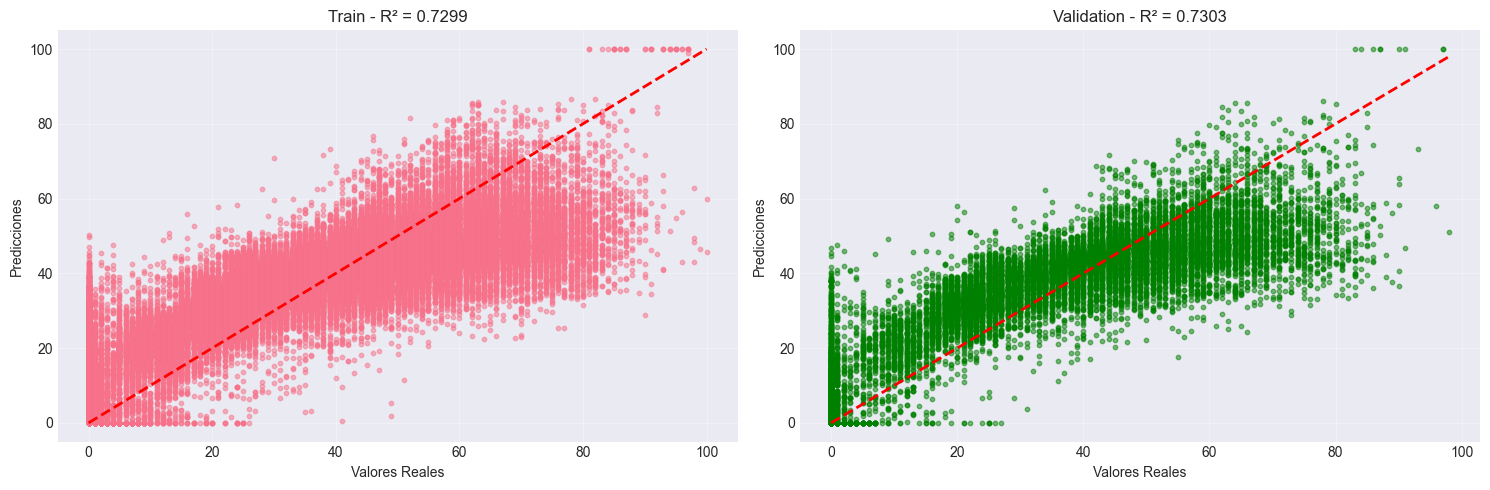

In [ ]:
# Visualización 1: Predicciones vs Valores Reales
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Train
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=10)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Valores Reales')
axes[0].set_ylabel('Predicciones')
axes[0].set_title(f'Train - R² = {metricas_train["R²"]:.4f}')
axes[0].grid(True, alpha=0.3)

# Validation
axes[1].scatter(y_val, y_val_pred, alpha=0.5, s=10, color='green')
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[1].set_xlabel('Valores Reales')
axes[1].set_ylabel('Predicciones')
axes[1].set_title(f'Validation - R² = {metricas_val["R²"]:.4f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


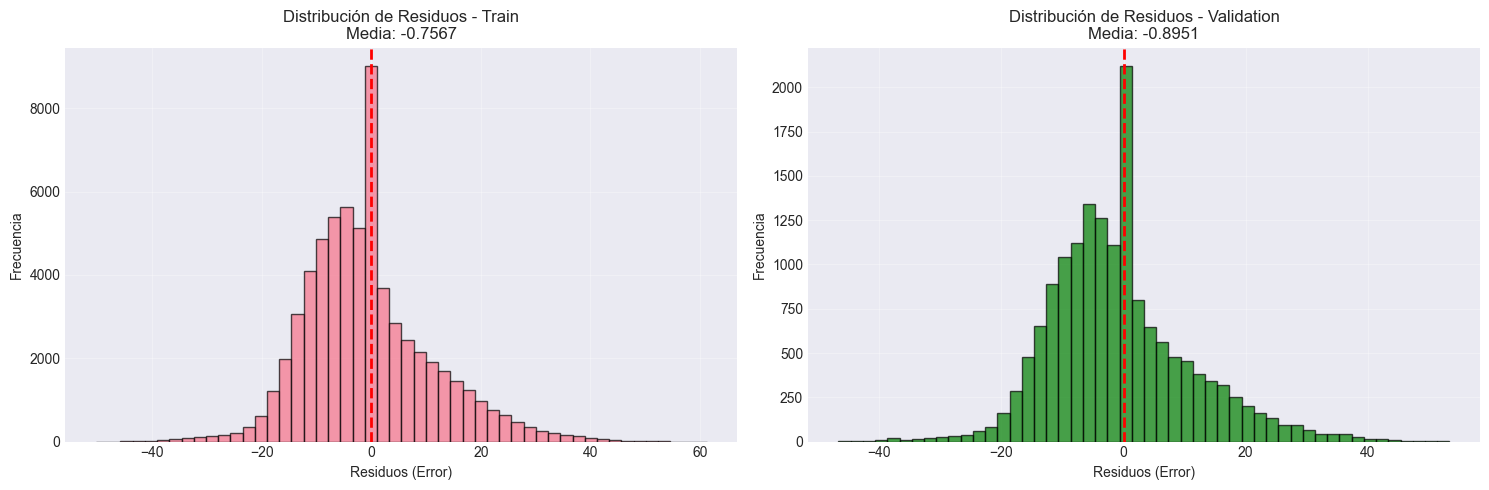

In [ ]:
# Visualización 2: Residuos (errores)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

residuos_train = y_train - y_train_pred
residuos_val = y_val - y_val_pred

# Distribución de residuos - Train
axes[0].hist(residuos_train, bins=50, alpha=0.7, edgecolor='black')
axes[0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residuos (Error)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title(f'Distribución de Residuos - Train\nMedia: {residuos_train.mean():.4f}')
axes[0].grid(True, alpha=0.3)

# Distribución de residuos - Validation
axes[1].hist(residuos_val, bins=50, alpha=0.7, edgecolor='black', color='green')
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residuos (Error)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title(f'Distribución de Residuos - Validation\nMedia: {residuos_val.mean():.4f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


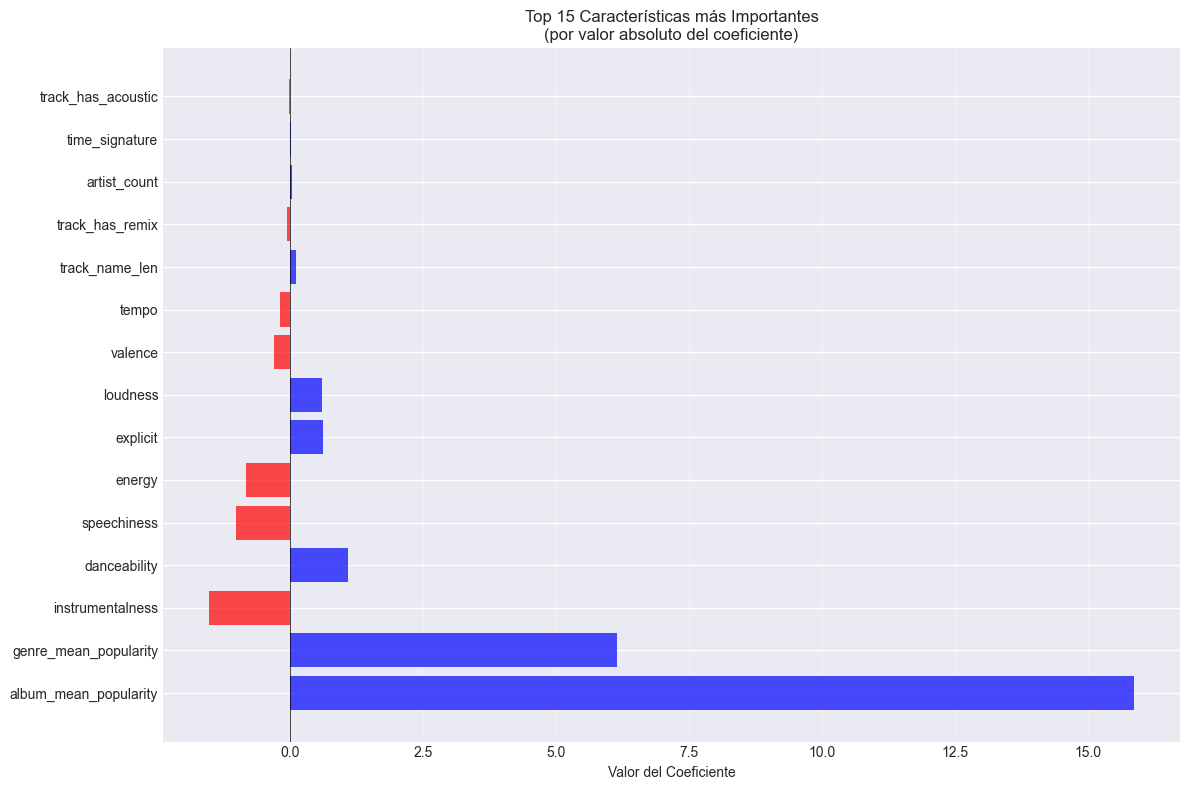

In [ ]:
# Visualización 3: Coeficientes del modelo
plt.figure(figsize=(12, 8))
coeficientes_plot = coeficientes.head(15)
colors = ['red' if x < 0 else 'blue' for x in coeficientes_plot['Coeficiente']]
plt.barh(range(len(coeficientes_plot)), coeficientes_plot['Coeficiente'], color=colors, alpha=0.7)
plt.yticks(range(len(coeficientes_plot)), coeficientes_plot['Característica'])
plt.xlabel('Valor del Coeficiente')
plt.title('Top 15 Características más Importantes\n(por valor absoluto del coeficiente)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


## 9. Comparación de Desempeño

Resumen comparativo del desempeño del modelo.


In [ ]:
# Resumen comparativo
resumen = pd.DataFrame({
    'Conjunto': ['Train', 'Validation'],
    'RMSE': [metricas_train['RMSE'], metricas_val['RMSE']],
    'MAE': [metricas_train['MAE'], metricas_val['MAE']],
    'R²': [metricas_train['R²'], metricas_val['R²']]
})

print("=" * 60)
print("📊 RESUMEN DE DESEMPEÑO - REGRESIÓN LINEAL")
print("=" * 60)
print(resumen.to_string(index=False))
print("=" * 60)

# Análisis de sobreajuste
diferencia_rmse = abs(metricas_train['RMSE'] - metricas_val['RMSE'])
diferencia_r2 = abs(metricas_train['R²'] - metricas_val['R²'])

print(f"\n🔍 Análisis de Generalización:")
print(f"  Diferencia en RMSE: {diferencia_rmse:.4f}")
print(f"  Diferencia en R²: {diferencia_r2:.4f}")

if diferencia_r2 < 0.05:
    print("  ✅ El modelo generaliza bien (diferencia pequeña entre train y validation)")
else:
    print("  ⚠️  Posible sobreajuste (diferencia significativa entre train y validation)")


📊 RESUMEN DE DESEMPEÑO - REGRESIÓN LINEAL
  Conjunto      RMSE      MAE       R²
     Train 11.616916 8.762149 0.729936
Validation 11.546602 8.685475 0.730339

🔍 Análisis de Generalización:
  Diferencia en RMSE: 0.0703
  Diferencia en R²: 0.0004
  ✅ El modelo generaliza bien (diferencia pequeña entre train y validation)


## 10. Predicciones en Test

Generamos predicciones para el conjunto de test.


✅ Predicciones en test generadas

📊 Estadísticas de predicciones (test) - ANTES del clipping:
  Total de predicciones: 34200
  Mínimo: -27.87
  Máximo: 113.66
  Media: 32.82
  Desviación estándar: 18.27
  Valores fuera de [0, 100]: 3024 (8.84%)

📊 Estadísticas de predicciones (test) - DESPUÉS del clipping:
  Mínimo: 0.00
  Máximo: 100.00
  Media: 33.60
  Desviación estándar: 16.47

✅ Predicciones guardadas en: c:\Users\alfon\Escritorio\Licenciatura en Sistemas\Machine Learning\Obligatorio\data\predictions_regresion_lineal.csv

📊 Primeras 5 predicciones:
                 track_id  popularity
0  6KwkVtXm8OUp2XffN5k7lY   49.980870
1  2dp5I5MJ8bQQHDoFaNRFtX   11.907503
2  5avw06usmFkFrPjX8NxC40   15.082580
3  75hT0hvlESnDJstem0JgyR    0.000000
4  4bY2oZGA5Br3pTE1Jd1IfY   33.274349


✅ Librerías adicionales importadas para evaluación sistemática


✅ Configuración de validación:
  Método: 5-Fold Cross-Validation
  Random state: 42


🔄 Evaluando: Regresión Lineal Simple (Baseline)

📈 Métricas - Validation - Linear Regression:
  RMSE: 11.5466
  MSE:  133.3240
  MAE:  8.6855
  R²:   0.7303

📊 Cross-Validation (5-fold):
  RMSE medio: 12.0805 (+/- 0.1091)
  R² medio: 0.7079 (+/- 0.0036)



🔄 Evaluando: Ridge Regression (Regularización L2)
⏳ Realizando búsqueda de hiperparámetros...

✅ Mejor configuración encontrada:
  alpha: 10.0
  Mejor score (neg MSE): -145.9511

📈 Métricas - Validation - Ridge (mejor):
  RMSE: 11.5470
  MSE:  133.3335
  MAE:  8.6858
  R²:   0.7303

📊 Cross-Validation (5-fold) - Mejor modelo:
  RMSE medio: 12.0810 (+/- 1.6244)
  R² medio: 0.7079 (+/- 0.0036)



🔄 Evaluando: Lasso Regression (Regularización L1)
⏳ Realizando búsqueda de hiperparámetros...



✅ Mejor configuración encontrada:
  alpha: 0.01
  Mejor score (neg MSE): -145.9498

📈 Métricas - Validation - Lasso (mejor):
  RMSE: 11.5482
  MSE:  133.3601
  MAE:  8.6878
  R²:   0.7303

📊 Cross-Validation (5-fold) - Mejor modelo:
  RMSE medio: 12.0810 (+/- 1.6254)
  R² medio: 0.7079 (+/- 0.0036)



🔄 Evaluando: ElasticNet Regression (L1 + L2)
⏳ Realizando búsqueda de hiperparámetros...
  Combinaciones a probar: 25

✅ Mejor configuración encontrada:
  alpha: 0.01
  l1_ratio: 0.9
  Mejor score (neg MSE): -145.9503

📈 Métricas - Validation - ElasticNet (mejor):
  RMSE: 11.5506
  MSE:  133.4175
  MAE:  8.6900
  R²:   0.7302

📊 Cross-Validation (5-fold) - Mejor modelo:
  RMSE medio: 12.0810 (+/- 1.6267)
  R² medio: 0.7079 (+/- 0.0036)


📊 TABLA COMPARATIVA - REGRESIÓN LINEAL

Métricas de Cross-Validation (5-fold) y Validation:
          Modelo          Hiperparámetros  RMSE_CV_mean  RMSE_CV_std  R²_CV_mean  R²_CV_std  RMSE_Val    MSE_Val  MAE_Val   R²_Val
LinearRegression       Sin regularización     12.080530     0.109127    0.707920   0.003559 11.546602 133.324007 8.685475 0.730339
           Ridge               alpha=10.0     12.081022     1.624433    0.707920   0.003560 11.547014 133.333534 8.685847 0.730320
           Lasso               alpha=0.01     12.080967     1.625391    0.707922   0.003558 11.548165 133.360113 8.687837 0.730266
      ElasticNet alpha=0.01, l1_ratio=0.9     12.080990     1.626723    0.707921   0.003565 11.550650 133.417512 8.689985 0.730150

🏆 MEJOR MODELO DE REGRESIÓN LINEAL:
  Modelo: LinearRegression
  Hiperparámetros: Sin regularización
  RMSE (Validation): 11.5466
  R² (Validation): 0.7303
  MAE (Validation): 8.6855

📊 Métricas de Cross-Validation:
  RMSE medio: 12.0805 (+/- 0.1091)
 

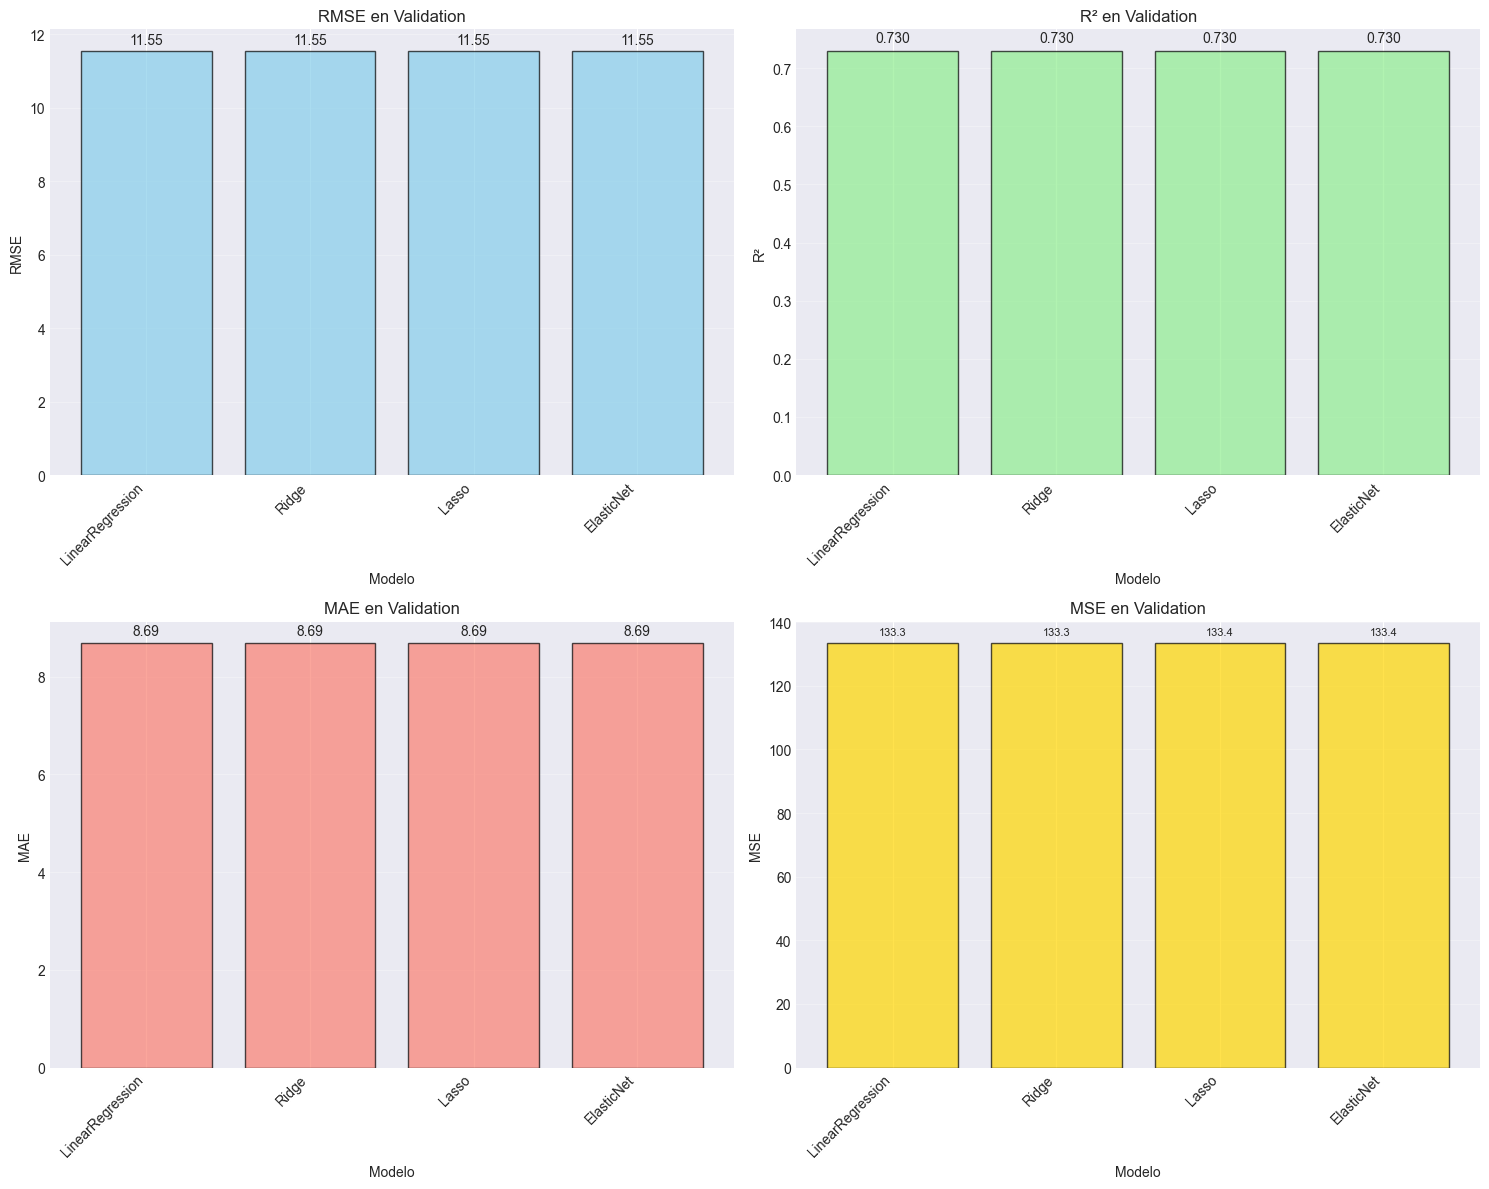

📊 ANÁLISIS DETALLADO - RIDGE REGRESSION

Efecto de diferentes valores de alpha:
   alpha  RMSE_CV_mean  RMSE_CV_std
   0.001     12.081023     1.624146
   0.010     12.081023     1.624146
   0.100     12.081023     1.624149
   1.000     12.081023     1.624174
  10.000     12.081022     1.624433
 100.000     12.081052     1.627005
1000.000     12.085004     1.651418


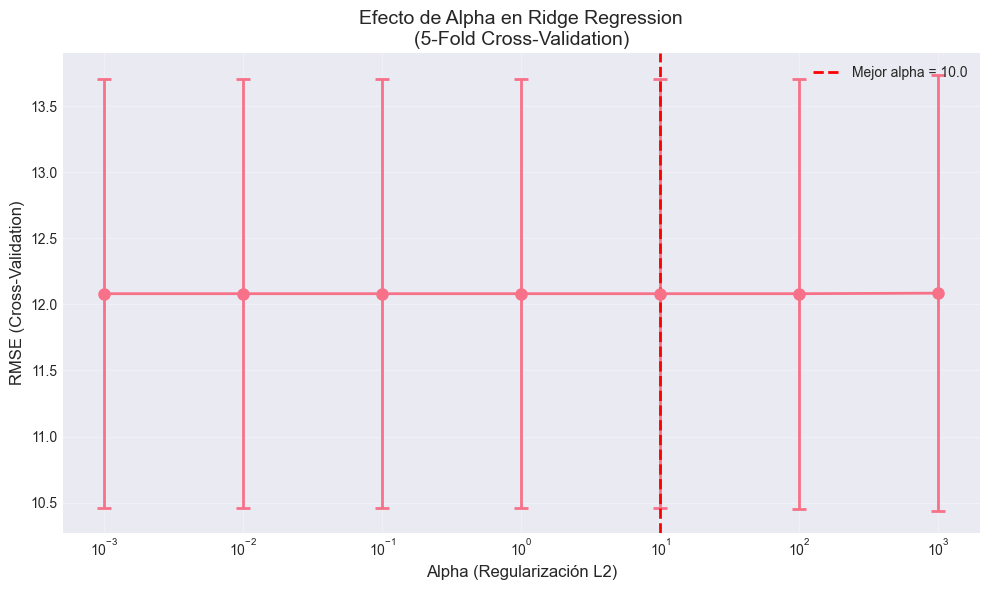

## 11. Conclusiones

### Resumen del Modelo de Regresión Lineal

El modelo de Regresión Lineal ha sido entrenado y evaluado con las siguientes características:

- **Características utilizadas**: Variables numéricas y características de feature engineering (artist_count, album_mean_popularity, genre_mean_popularity, etc.)
- **Escalado**: StandardScaler aplicado a todas las características
- **Post-procesamiento**: Clipping aplicado al rango válido [0, 100] para mantener predicciones dentro del dominio de la variable objetivo
- **Métricas principales**: RMSE, MAE y R²

### Ventajas de la Regresión Lineal:
- ✅ Modelo interpretable (coeficientes muestran la importancia de cada característica)
- ✅ Rápido de entrenar y predecir
- ✅ No requiere ajuste de hiperparámetros complejos
- ✅ Funciona bien cuando hay relaciones lineales entre características y target
- ✅ El clipping asegura que las predicciones estén en el rango válido [0, 100]

### Limitaciones:
- ⚠️ Asume relaciones lineales (puede no capturar relaciones no lineales)
- ⚠️ Sensible a outliers
- ⚠️ Requiere que las características sean independientes (multicolinealidad puede ser un problema)
- ⚠️ Puede generar predicciones fuera del rango válido (solucionado con clipping)

Este modelo servirá como baseline para comparar con otros modelos más complejos como Random Forest, Gradient Boosting o Redes Neuronales.
